In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Load data
gh_trvlmode_data = pd.read_csv('GroupedDataONS/GenHealth3cat_travelmode 12 cat_custom-filtered-2023-11-09T17_58_40Z.csv')

In [23]:
gh_trvlmode_data_fin=[]
gh_trvlmode_data_fin = gh_trvlmode_data

new_column_names=list()
new_column_names=[
'la_code'
,'la_name'
,'gh_cat'
,'gh_desc'
,'trvlmode_cat'
,'trvlmode_desc'
,'people_cnt'
]
column_mapping = dict(zip(gh_trvlmode_data.columns, new_column_names))
gh_trvlmode_data_fin.rename(columns=column_mapping, inplace=True)

In [24]:
#Check how many records are there with does not apply value
filtered_df = gh_trvlmode_data_fin[gh_trvlmode_data_fin['gh_desc'] == 'Does not apply']
filtered_df1 = filtered_df[filtered_df['people_cnt'] != 0]
print(filtered_df1)

gh_trvlmode_data_fin.count()

la_code          11880
la_name          11880
gh_cat           11880
gh_desc          11880
trvlmode_cat     11880
trvlmode_desc    11880
people_cnt       11880
dtype: int64

In [25]:

# Remove the records with heneral health does not apply as there are no values for these in people count
gh_trvlmode_data_fin = gh_trvlmode_data_fin[gh_trvlmode_data_fin['gh_desc'] != 'Does not apply']


In [26]:
gh_trvlmode_data_fin.count()

la_code          7920
la_name          7920
gh_cat           7920
gh_desc          7920
trvlmode_cat     7920
trvlmode_desc    7920
people_cnt       7920
dtype: int64

In [28]:
gh_trvlmode_data_fin

,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,people_cnt
12,E06000001,Hartlepool,1,Good health,1,Work mainly at or from home,5756
13,E06000001,Hartlepool,1,Good health,2,"Underground, metro, light rail, tram",30
14,E06000001,Hartlepool,1,Good health,3,Train,244
15,E06000001,Hartlepool,1,Good health,4,"Bus, minibus or coach",1007
16,E06000001,Hartlepool,1,Good health,5,Taxi,508
...,...,...,...,...,...,...,...
11875,W06000024,Merthyr Tydfil,2,Not good health,8,Passenger in a car or van,275
11876,W06000024,Merthyr Tydfil,2,Not good health,9,Bicycle,9
11877,W06000024,Merthyr Tydfil,2,Not good health,10,On foot,239
11878,W06000024,Merthyr Tydfil,2,Not good health,11,Other method of travel to work,51


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder()


# Assuming df is your DataFrame
df_encoded = pd.get_dummies(gh_trvlmode_data_fin, columns=['gh_cat', 'trvlmode_cat'], prefix=['gh', 'trvlmodes'])


In [31]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df_encoded['gh_1'], df_encoded['trvlmode_3'])
print(f"Point-Biserial Correlation: {correlation}, p-value: {p_value}")

Point-Biserial Correlation: 0.0, p-value: 1.0000000000067013


In [38]:
column_pattern = 'trvlmodes_'  # Replace with your desired pattern
matching_columns = [col for col in df_encoded.columns if col.startswith(column_pattern)]

In [41]:
df_encoded

,la_code,la_name,gh_desc,trvlmode_desc,people_cnt,gh_1,gh_2,trvlmodes_1,trvlmodes_2,trvlmodes_3,trvlmodes_4,trvlmodes_5,trvlmodes_6,trvlmodes_7,trvlmodes_8,trvlmodes_9,trvlmodes_10,trvlmodes_11,trvlmodes_12
12,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
13,E06000001,Hartlepool,Good health,"Underground, metro, light rail, tram",30,1,0,0,1,0,0,0,0,0,0,0,0,0,0
14,E06000001,Hartlepool,Good health,Train,244,1,0,0,0,1,0,0,0,0,0,0,0,0,0
15,E06000001,Hartlepool,Good health,"Bus, minibus or coach",1007,1,0,0,0,0,1,0,0,0,0,0,0,0,0
16,E06000001,Hartlepool,Good health,Taxi,508,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,W06000024,Merthyr Tydfil,Not good health,Passenger in a car or van,275,0,1,0,0,0,0,0,0,0,1,0,0,0,0
11876,W06000024,Merthyr Tydfil,Not good health,Bicycle,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
11877,W06000024,Merthyr Tydfil,Not good health,On foot,239,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11878,W06000024,Merthyr Tydfil,Not good health,Other method of travel to work,51,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
from scipy.stats import pearsonr
# Select the two columns for which you want to calculate the correlation
column2 = df_encoded['gh_1']
correlation_table=[]
for columnname in matching_columns:
    column1 = df_encoded[columnname]
     # Calculate the correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(column1, column2)
    correlation_table.append([columnname,'GH',correlation_coefficient,p_value])

# Create a Pandas DataFrame from the correlation_table
correlation_df = pd.DataFrame(correlation_table, columns=['column1', 'column2', 'correlation_coefficient', 'p_value'])

# Print the results
correlation_df

,column1,column2,correlation_coefficient,p_value
0,trvlmodes_1,GH,0.0,1.0
1,trvlmodes_2,GH,0.0,1.0
2,trvlmodes_3,GH,0.0,1.0
3,trvlmodes_4,GH,0.0,1.0
4,trvlmodes_5,GH,0.0,1.0
5,trvlmodes_6,GH,0.0,1.0
6,trvlmodes_7,GH,0.0,1.0
7,trvlmodes_8,GH,0.0,1.0
8,trvlmodes_9,GH,0.0,1.0
9,trvlmodes_10,GH,0.0,1.0


In [42]:
# Repeat rows based on 'people_cnt'
df_replicated = df_encoded.loc[df_encoded.index.repeat(df_encoded['people_cnt'])].reset_index(drop=True)


In [43]:
df_replicated.shape[0]

59595497

In [45]:
df_replicated.head(10)

,la_code,la_name,gh_desc,trvlmode_desc,people_cnt,gh_1,gh_2,trvlmodes_1,trvlmodes_2,trvlmodes_3,trvlmodes_4,trvlmodes_5,trvlmodes_6,trvlmodes_7,trvlmodes_8,trvlmodes_9,trvlmodes_10,trvlmodes_11,trvlmodes_12
0,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,E06000001,Hartlepool,Good health,Work mainly at or from home,5756,1,0,1,0,0,0,0,0,0,0,0,0,0,0


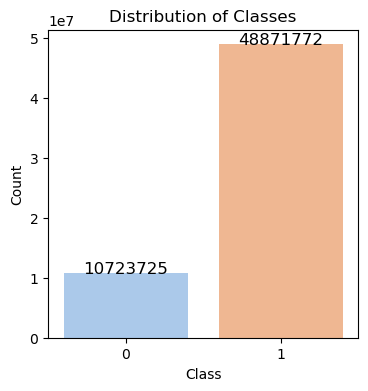

In [46]:
plt.figure(figsize=(4, 4))
ax=sns.countplot(data=df_replicated, x='gh_1', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)
# Add title and labels
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
# Show the plot
plt.show()

In [53]:
# Calculate the strength of relationship between feature and class variable.
#warnings.filterwarnings("ignore")

data = df_replicated.drop('la_code', axis=1)
data = data.drop('gh_desc',	axis=1)
data = data.drop('la_name', axis=1)
data = data.drop('trvlmode_desc',axis=1)
data = data.drop('people_cnt', axis=1)
data = data.drop('gh_2', axis=1)
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_1':  # Exclude the class variable itself
        crosstab = pd.crosstab(data[feature], data['gh_1'])
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


NameError: name 'stats' is not defined